# Curve Fitting with Bayesian Ridge Regression

1. Different inital values ($\alpha$, $\lambda$) strongly  influence the model.  
   理想来说，贝叶斯估计目的结果就是 $\alpha$, $\lambda$ 收敛，不论初值如何不同，只是收敛速度问题。  
   实际上，尤其在数据量较小时候，数据信息不足，在更新迭代过程中，会类似梯度下降那样 收敛到不稳定的值 或者局部最优。
3. By calculating Log marginal ❓ likelihood of these models, we can determine which one is better.


In the every iteration, we can 积分$w$，Then log this, we can get a value!
$$ 
p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha^{-1})
$$
$$\log p(y | X, \alpha) = -\frac{1}{2} \left( n \log 2\pi + \log |C| + y^T C^{-1} y \right)$$

## Generate sinusoidal data with noise
Bayesian linar regression to estimate $Sin(2\pi x)$

In [18]:
import numpy as np
def func(x):
    return np.sin(2*np.pi*x)

size = 25
rng = np.random.RandomState(42)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0, 1.0, 100)

In [47]:
from sklearn.linear_model import BayesianRidge

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

## Plot the true and predicted curves with log marginal likelihood (L)

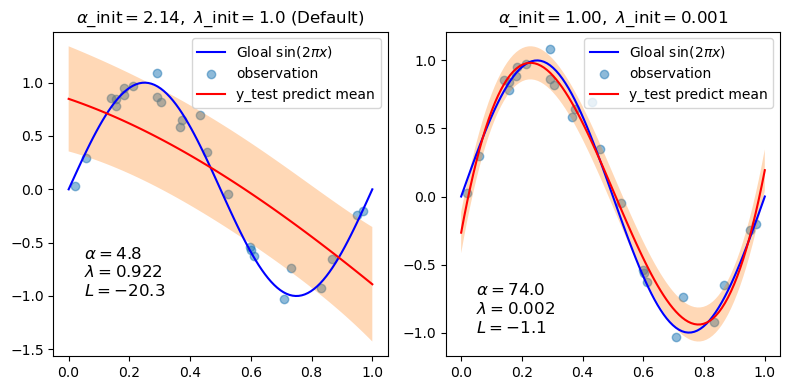

In [46]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(8,4))
for i,ax in enumerate(axes):
    if i==0:
        init = [1/np.var(y_train), 1.0] # Default value 
    else:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0],lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True) # ❓Bayesian y is distribution
    ax.plot(x_test, func(x_test), color='blue', label='Gloal sin($2 \\pi x$)')
    ax.scatter(x_train,y_train,alpha=0.5,label='observation')
    ax.plot(x_test,ymean, color='red', label='y_test predict mean')
    ax.fill_between(x_test,ymean-ystd,ymean+ystd,alpha=0.3) # 每个xtest 可视ytest分布区间
    ax.legend()
    title = f"$\\alpha$_init$={init[0]:.2f},\\ \\lambda$_init$={init[1]}$"
    if i ==0:
        title += " (Default)"
    ax.set_title(title,fontsize = 12)
    text = f"$\\alpha={reg.alpha_:.1f}$\n$\\lambda={reg.lambda_:.3f}$\n$L={reg.scores_[-1]:.1f}$"
    ax.text(0.05, -1.0, text, fontsize=12)
plt.tight_layout()

📈Appearently , we set a better value !

<Axes: ylabel='Count'>

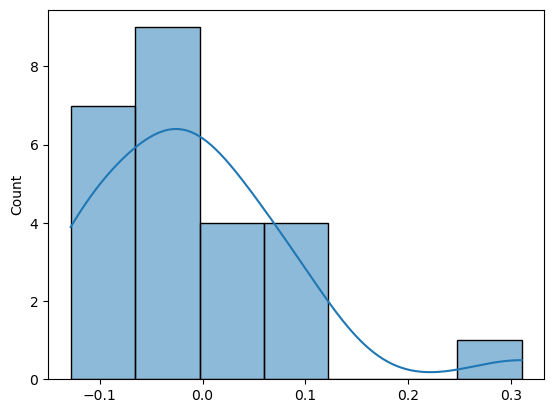

In [16]:
r = rng.normal(scale=0.1, size=25)
sns.histplot(r,kde=True)

<Axes: ylabel='Count'>

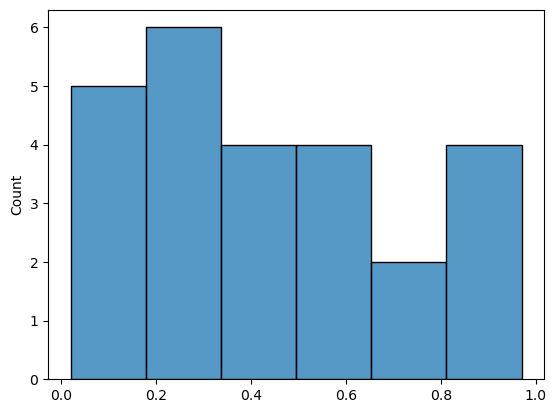

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x_train)